In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

from scipy.stats import zscore
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
# Read in data for two .csv dataset files into 2 different dataframes
 
df_car_type = pd.read_csv('Part1-Car name.csv')
df_car_json = pd.read_json('Part1-Car-Attributes.json')

In [ ]:
# Analysing Data

df_car_type.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [ ]:
df_car_json.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
# Merge both dataframes into one dataframe

df_car = pd.concat([df_car_type, df_car_json], axis=1, join='inner')
df_car.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
df_car.shape

(398, 9)

In [ ]:
df_car.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [ ]:
# Drop columns with no actual significance in Model Training

df_car_numerical = df_car.drop(['car_name'], axis=1)

# Display Five-Point-Summary of all Numerical columns in dataset to understand data distribution

df_car_numerical.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Checking for Feature-wise percentage of null values in the entire dataset to be imputed/dropped

(df_car.isnull().sum()/len(df_car))*100


car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [ ]:
# Finding if there are any duplicated rows in the datasets
bool = df_car.duplicated()
bool.value_counts()

False    398
dtype: int64

In [ ]:
# Number of Unique values for all dataset columns

df_car.nunique()

car_name    305
mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
dtype: int64

In [ ]:
# checking for unexpected/invalid values iterating through dataset columns

for (columnName, columnData) in df_car.iteritems():
    print (columnName, ":", df_car[columnName].unique())

car_name : ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 

In [ ]:
df_car.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [ ]:
# Checking value counts of classes in the column 'hp' to find the value to be used for imputation in in place of invalid values
print(df_car.hp.value_counts().to_string())

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1


In [ ]:
# Imputing the invalid '?' value with the most common class value (mode) under column 'hp'

df_car['hp'] = df_car['hp'].replace(['?'],'150')
df_car.hp.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '150', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [ ]:
# Change the datatype for 'hp' column to int64 type
df_car['hp'] = df_car['hp'].astype('int64')

In [ ]:
df_car.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

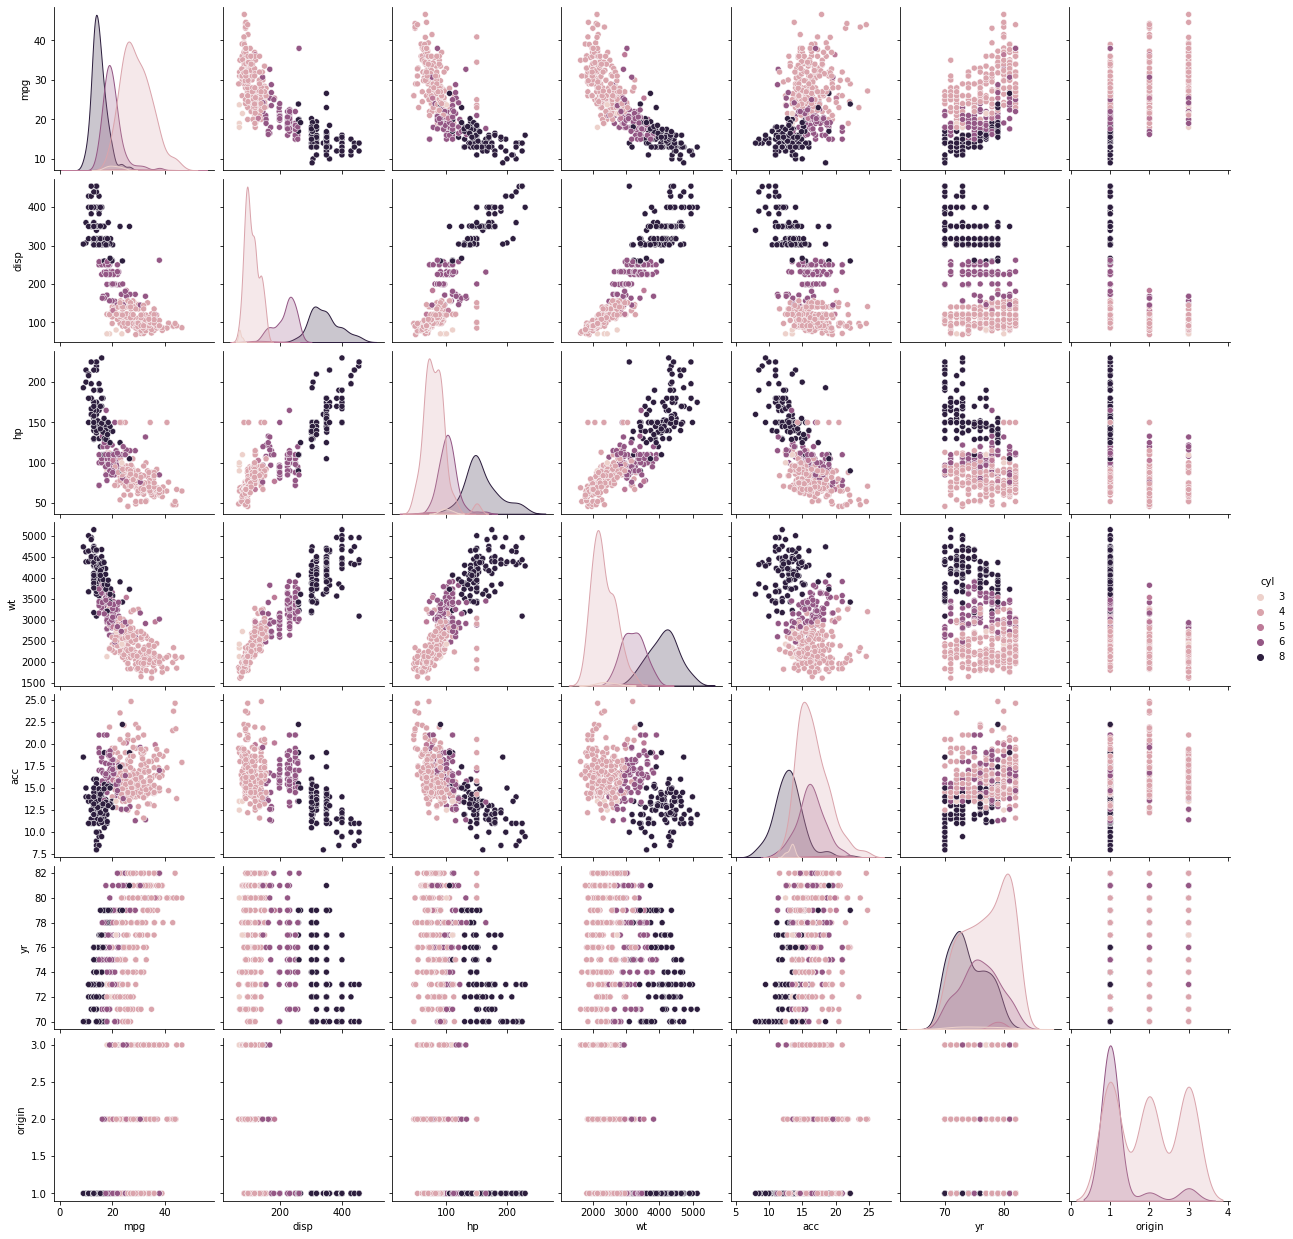

In [ ]:
# Feature-wise pairplot

sns.pairplot(df_car, hue ='cyl', kind='scatter')

(-10.0, 175.0)

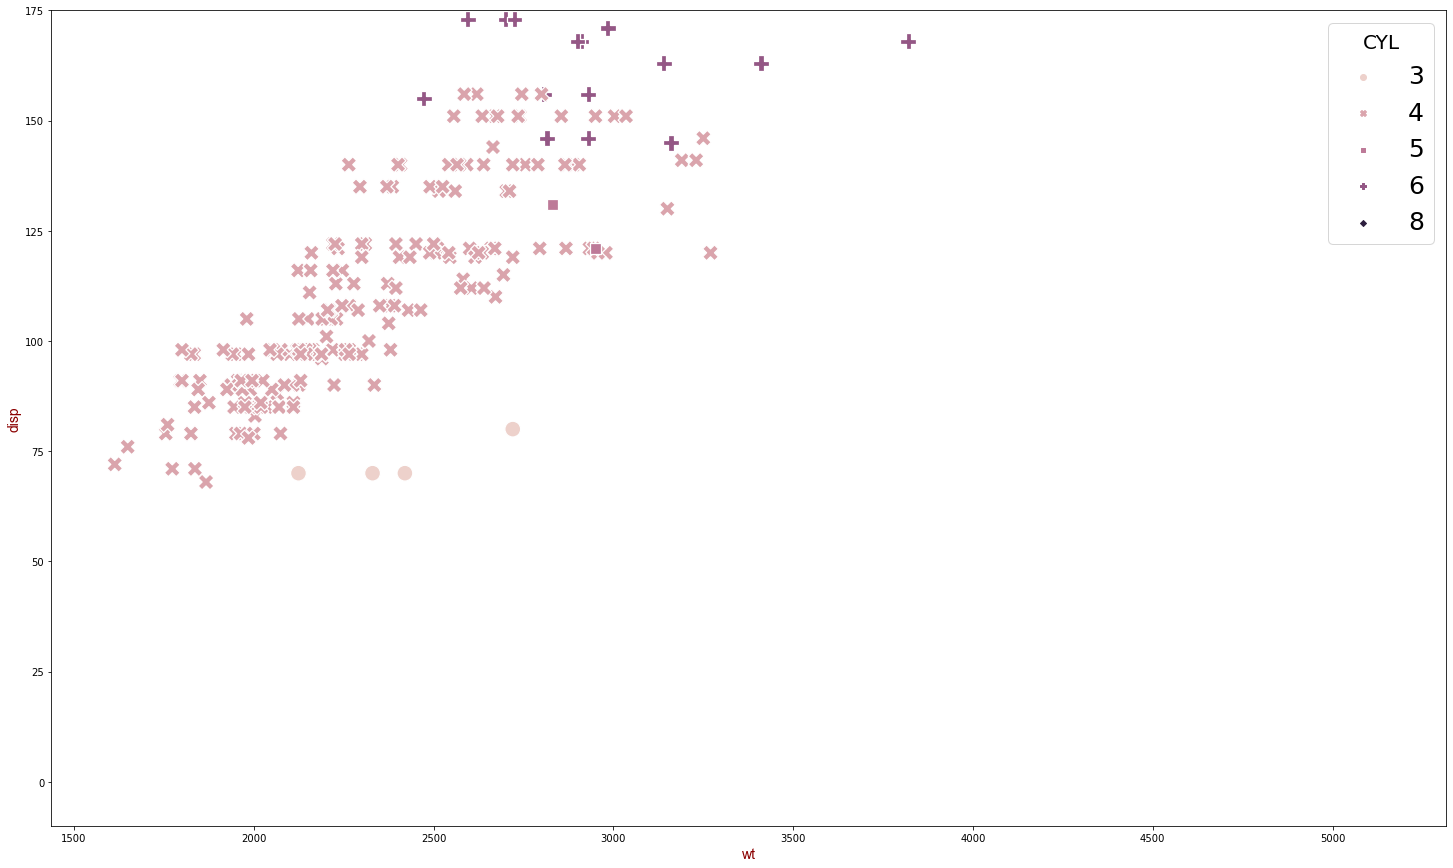

In [ ]:
# Scatter Plot between 'wt' & 'disp' with datapoints categorized based on 'cyl' 

plt.figure(figsize=(25,15))

sns.scatterplot(x = "wt",
                y = "disp",
                hue = "cyl",
                style = "cyl",
                data = df_car, s=250)

font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }
plt.xlabel('wt', fontdict = font)
plt.ylabel('disp',fontdict = font)

#plt.legend(title='CYL', fontsize='x-large', title_fontsize='20')
plt.legend(title='CYL', fontsize=25, title_fontsize='20')

plt.ylim( [ -10, 175 ] ) 

(-10.0, 175.0)

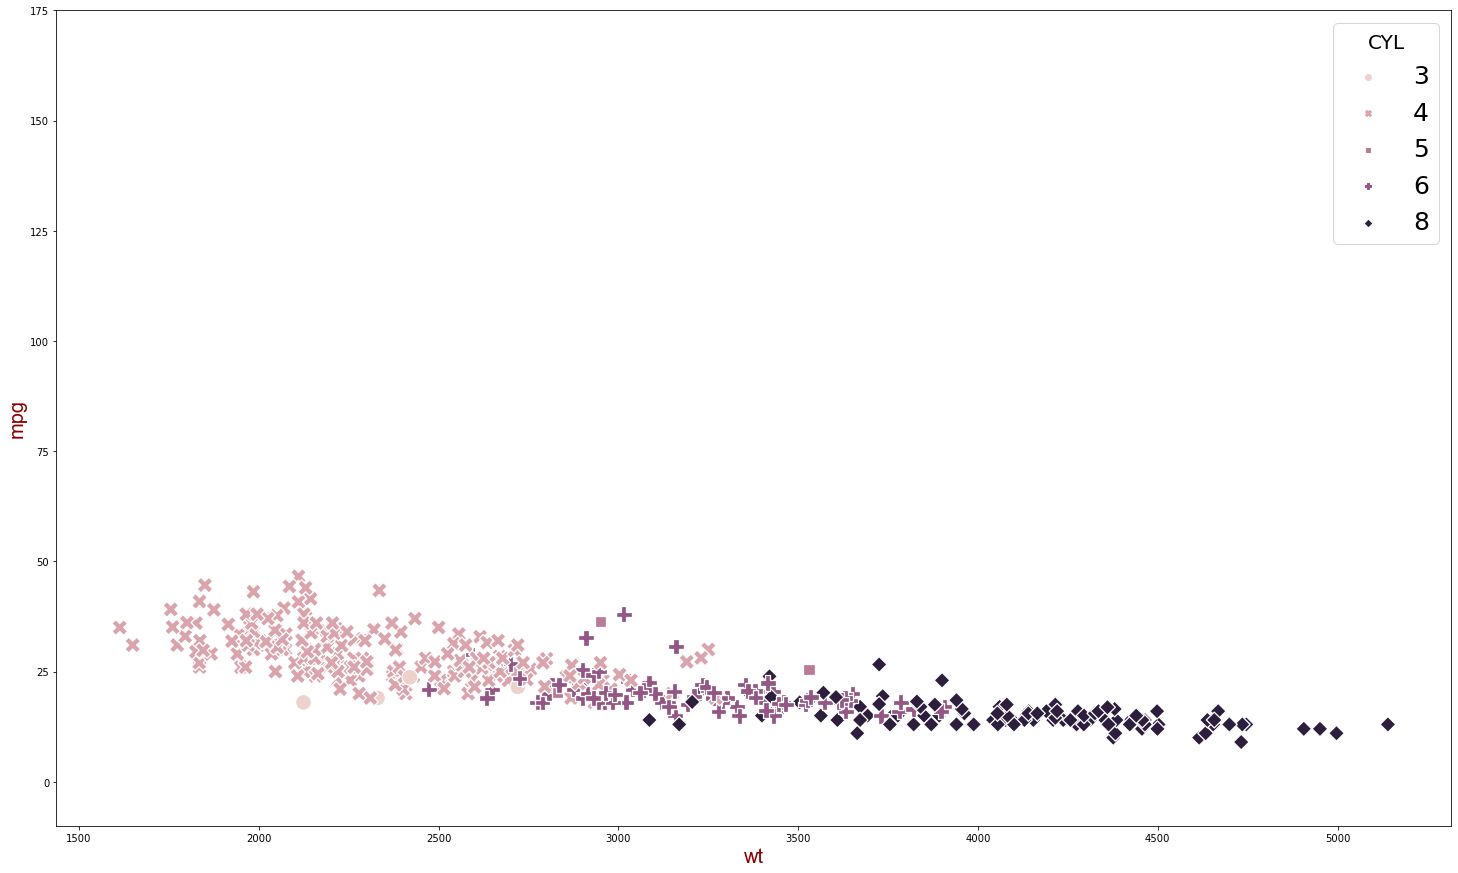

In [ ]:
# Scatter Plot between 'wt' & 'mpg' with datapoints categorized based on 'cyl' 

plt.figure(figsize=(25,15))

sns.scatterplot(x = "wt",
                y = "mpg",
                hue = "cyl",
                style = "cyl",
                data = df_car, s=250)

font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
plt.xlabel('wt', fontdict = font)
plt.ylabel('mpg',fontdict = font)

#plt.legend(title='CYL', fontsize='x-large', title_fontsize='20')

plt.legend(title='CYL', fontsize=25, title_fontsize='20')

plt.ylim( [ -10, 175 ] ) 

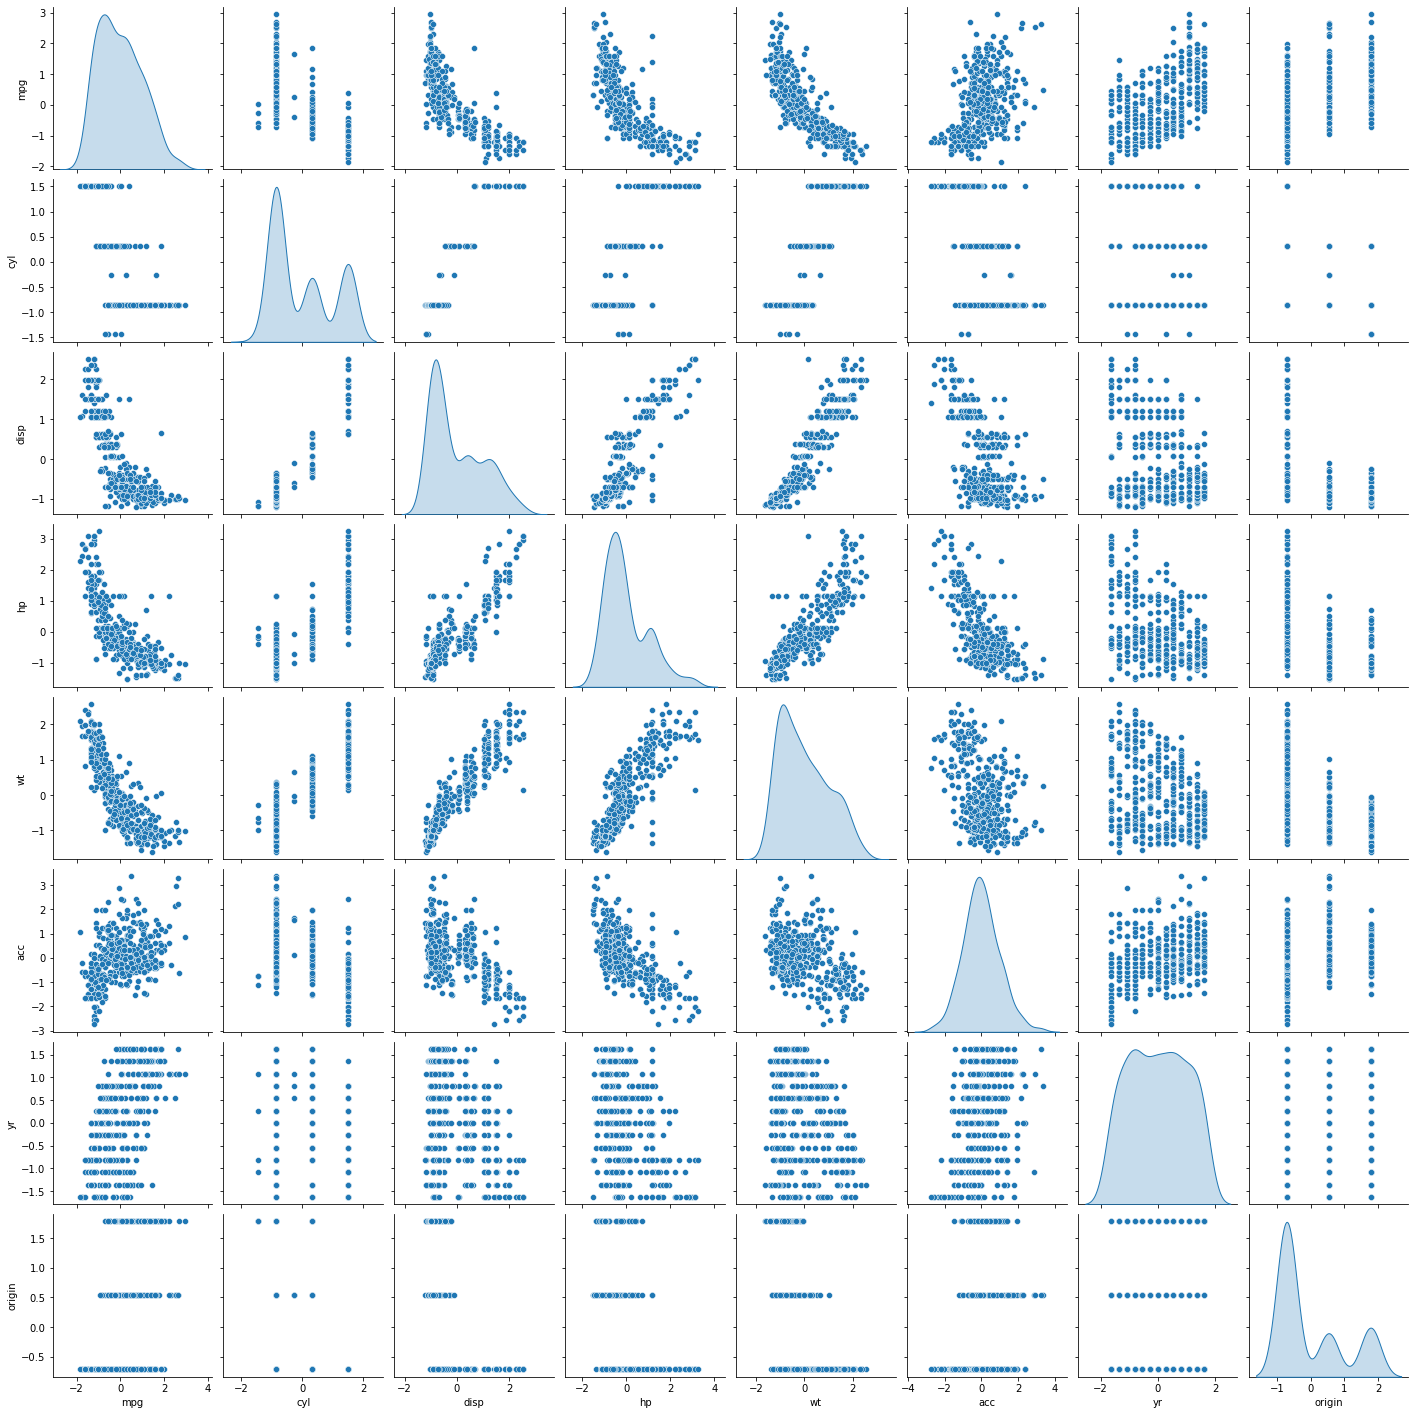

In [ ]:
# Drop 'car_name' column, scale the data with zscores & Plot a pairplot for all continuous variables

df_car_drop = df_car.iloc[:,1:]
df_car_scaled=df_car_drop.apply(zscore)
sns.pairplot(df_car_scaled,diag_kind='kde')

In [ ]:
df_car_scaled.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.644426,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.552280,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.163200,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.163200,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.903813,0.565841,-1.840117,-1.627426,-0.715145


In [ ]:
# Finding optimal no. of clusters

clusters=range(2,11)
meanDistortions=[]
silhouette_avg = []

# Training the dataset for each K value in the range [2,3,4,5,6,7,8,9,10]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_car_scaled)
    prediction=model.predict(df_car_scaled)
    
# finding the mean distortions (SSE)- sum of distance from each centroid for all datapoints particular k value 
    meanDistortions.append(sum(np.min(cdist(df_car_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_car_scaled.shape[0])

# Calculating the silhouette score fo each value of K
    cluster_labels = model.labels_
    silhouette_avg.append(silhouette_score(df_car_scaled, cluster_labels))

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

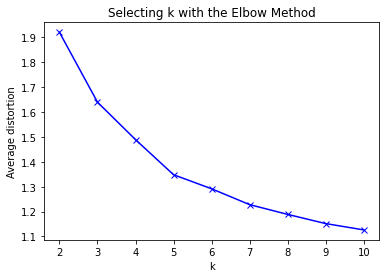

In [ ]:
#Visualize to find the Elbow points

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

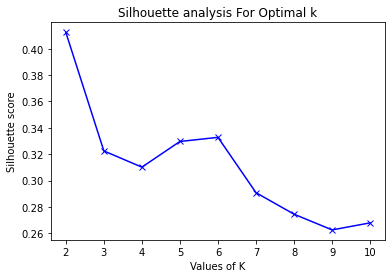

In [ ]:
# Visualize through plotting silhouette coeficients to get the optimal K value

plt.plot(clusters, silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')

In [ ]:
# Training the dataset with K=5

final_model=KMeans(5)
final_model.fit(df_car_scaled)
prediction=final_model.predict(df_car_scaled)

#predict the labels of clusters.
label = final_model.fit_predict(df_car_scaled)
 
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4 4 4 3 3 3 3 3 3 4 1 1 1 1 3 3 3 3 4 4 4 4
 4 1 1 1 1 1 1 1 4 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 3 1 1
 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 3 1 1 1 1 4 3 3 3
 3 3 4 3 1 1 3 3 3 3 1 3 3 1 4 4 4 4 0 3 0 3 4 4 4 1 1 1 1 1 3 3 3 0 0 3 3
 3 3 3 3 4 4 4 4 1 1 1 1 4 4 4 4 4 4 1 0 2 4 2 3 3 3 4 3 4 3 3 3 3 0 3 3 2
 2 3 1 1 1 1 4 4 4 4 2 2 3 0 4 4 4 4 3 0 0 2 3 1 3 3 4 1 1 1 1 0 2 0 2 0 1
 4 1 1 4 4 4 4 1 1 1 1 3 2 0 2 2 2 0 3 3 3 3 0 2 0 0 0 4 1 1 4 4 4 2 4 4 4
 4 4 4 1 4 1 1 2 0 0 2 3 2 2 0 3 4 3 4 0 0 4 4 2 4 4 4 1 1 4 1 1 4 1 0 0 2
 2 2 4 2 4 2 2 0 0 2 2 2 2 0 0 2 0 2 2 2 4 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0
 0 0 0 2 0 2 2 2 2 2 0 2 0 0 0 0 0 2 2 2 0 2 0 0 0 0 2 2 0 0 4 4 4 4 2 2 2
 2 2 2 2 2 0 0 0 2 2 0 0 0 0 0 0 2 2 2 4 0 2 2 2 0 2 2 2]


In [ ]:
# Append the prediction 
df_car["GROUP"] = prediction
df_car_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df_car.tail(20)

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
378,plymouth horizon miser,38.0,4,105.0,63,2125,14.7,82,1,4
379,mercury lynx l,36.0,4,98.0,70,2125,17.3,82,1,4
380,nissan stanza xe,36.0,4,120.0,88,2160,14.5,82,3,0
381,honda accord,36.0,4,107.0,75,2205,14.5,82,3,0
382,toyota corolla,34.0,4,108.0,70,2245,16.9,82,3,0
383,honda civic,38.0,4,91.0,67,1965,15.0,82,3,0
384,honda civic (auto),32.0,4,91.0,67,1965,15.7,82,3,0
385,datsun 310 gx,38.0,4,91.0,67,1995,16.2,82,3,0
386,buick century limited,25.0,6,181.0,110,2945,16.4,82,1,4
387,oldsmobile cutlass ciera (diesel),38.0,6,262.0,85,3015,17.0,82,1,4


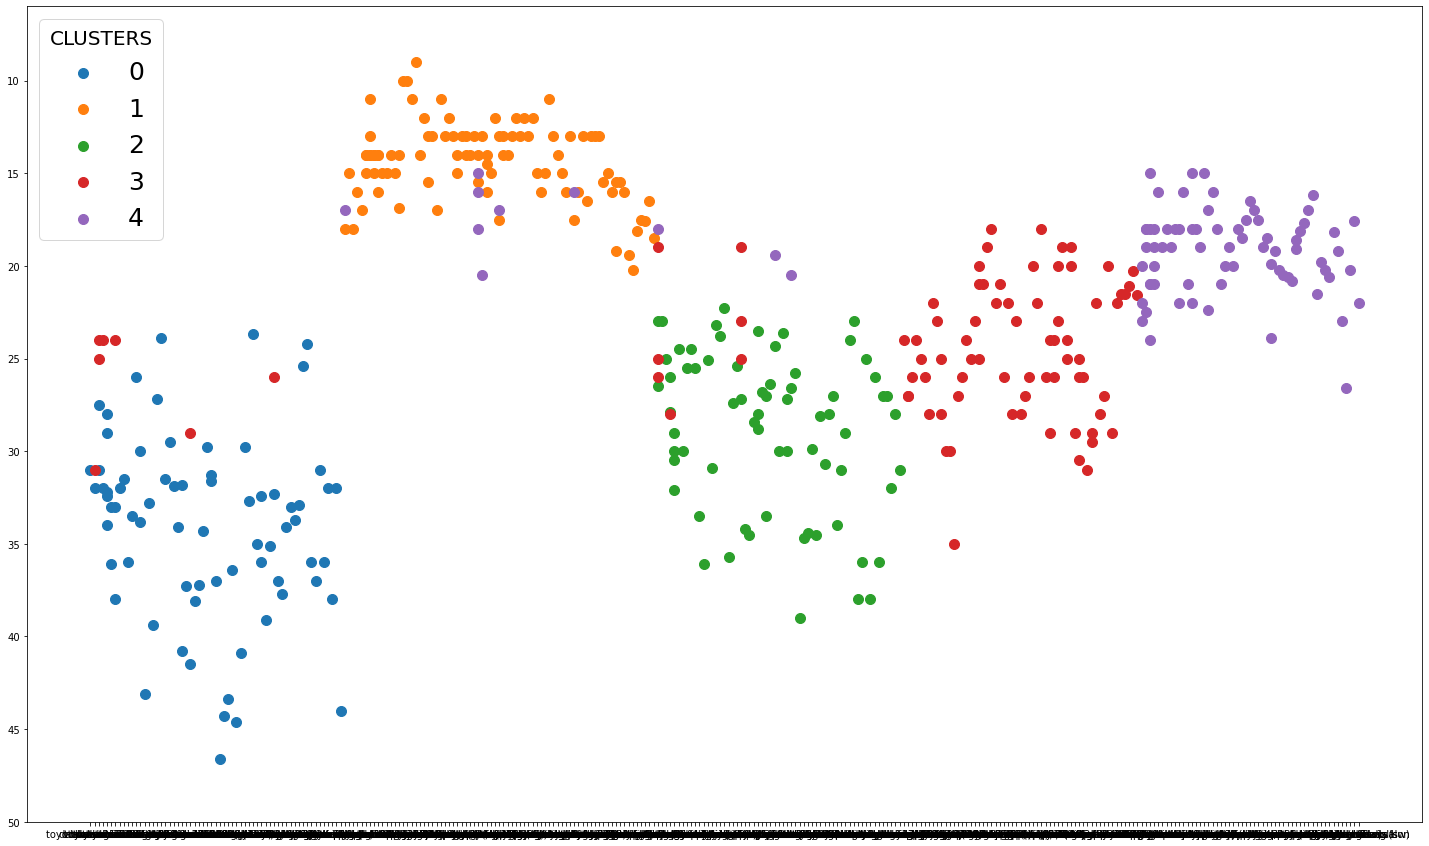

In [ ]:
# Visualizing the clusters

centroids = final_model.cluster_centers_
u_labels = np.unique(label)
 
# plotting the results:

plt.figure(figsize=(25,15))
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
for i in u_labels:
    plt.scatter(df_car.iloc[label == i , 0] , df_car.iloc[label == i , 1] , label = i, s = 100)
    
plt.legend(title='CLUSTERS', fontsize=25, title_fontsize='20')
plt.ylim( [ 50, 6 ] ) 
plt.show()

In [ ]:
# Drop the GROUP column to start with adding new datapoint for Testing
df_car_without_GROUP = df_car.iloc[:,:9]

In [ ]:
# Adding new datapoint to the existing dataframe for testing
df = {'car_name': 'volkswagen type 3', 'mpg': 22, 'cyl': 5, 'disp':101, 'hp':58, 'wt': 2750, 'acc':23.5, 'yr':74, 'origin':1}
df_car_without_GROUP = df_car_without_GROUP.append(df, ignore_index=True, verify_integrity = True)
df_car_without_GROUP.tail()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1
397,chevy s-10,31.0,4,119.0,82,2720,19.4,82,1
398,volkswagen type 3,22.0,5,101.0,58,2750,23.5,74,1


In [ ]:
# Drop the car_name column since being a object variable with string data cannot be used while scaling the data and does not help with predictions
df_car_without_GROUP_car_name = df_car_without_GROUP.iloc[:,1:]
df_car_without_GROUP_car_name_scaled = df_car_without_GROUP_car_name.apply(zscore)

In [ ]:
df_car_without_GROUP_car_name_scaled.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin
394,2.627922,-0.856647,-0.923960,-1.374877,-0.994180,3.242657,1.624783,0.535343
395,1.088817,-0.856647,-0.558964,-0.545351,-0.798865,-1.434929,1.624783,-0.713791
396,0.575782,-0.856647,-0.703042,-0.674965,-0.408235,1.083772,1.624783,-0.713791
397,0.960558,-0.856647,-0.712647,-0.597196,-0.295781,1.371623,1.624783,-0.713791
398,-0.193770,-0.267333,-0.885540,-1.219341,-0.260269,2.846862,-0.543406,-0.713791


In [ ]:
# Predicting using the K-Means model created the group for the new datapoint
prediction=final_model.predict(df_car_without_GROUP_car_name_scaled)
df_car_without_GROUP["GROUP"] = prediction
df_car_without_GROUP.tail()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2,0
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,2
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1,2
397,chevy s-10,31.0,4,119.0,82,2720,19.4,82,1,2
398,volkswagen type 3,22.0,5,101.0,58,2750,23.5,74,1,3
